# Example 1

In [1]:
print("Hello World!")

Hello World!


pip install -r requirements.txt

In [2]:
import requests
from html.parser import HTMLParser

In [3]:
url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Python (programming language) - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limit

In [4]:
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

In [5]:
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Python (programming language) - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History 2 Design philosophy and features 3 Syntax and semantics Toggle Syntax and semantics subsection 3.1 Indentation 3.2 Statements and control flow 3.3 Expressions 3.4 Methods 3.5 Typing 3.6 Arithmetic operations 4 Programming examples 5 Libraries 6 Development environments 7 Implementations Toggle Implementations subsection 7.1 Reference implementation 7.2 Other implementations 7.3 Unsupported implementations 7.4 Cross-compilers to other languages 7.5 Performance 8

In [6]:
import nlp_rake
import matplotlib.pyplot as plt

In [7]:
extractor = nlp_rake.Rake(max_words=2,min_freq=4,min_chars=5)
res = extractor.apply(text)
res

[('standard library', 4.0),
 ('machine code', 4.0),
 ('style guide', 3.857142857142857),
 ("o'reilly media", 3.833333333333333),
 ('scripting language', 3.8205128205128203),
 ('list comprehensions', 3.8),
 ('matrix multiplication', 3.8),
 ('assignment statement', 3.75),
 ('programming language', 3.7170645446507518),
 ('mixed types', 3.6),
 ('dynamic language', 3.5347985347985347),
 ('latest release', 3.375),
 ('programming languages', 3.2811671087533156),
 ('python code', 3.2534818941504176),
 ('python insider', 3.2534818941504176),
 ('version number', 3.076923076923077),
 ('language', 1.8205128205128205),
 ('statement', 1.75),
 ('syntax', 1.6956521739130435),
 ('division', 1.6923076923076923),
 ('types', 1.6),
 ('reference', 1.5555555555555556),
 ('block', 1.5555555555555556),
 ('expression', 1.5555555555555556),
 ('method', 1.5454545454545454),
 ('number', 1.5384615384615385),
 ('support', 1.5),
 ('design', 1.5),
 ('speed', 1.5),
 ('modules', 1.4444444444444444),
 ('object', 1.428571

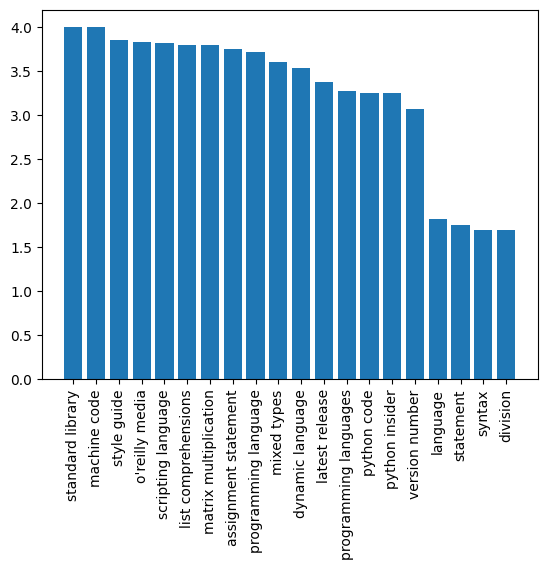

In [8]:
def plot(pair_list):
    pair_list = pair_list[:20]
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [9]:
from wordcloud import WordCloud

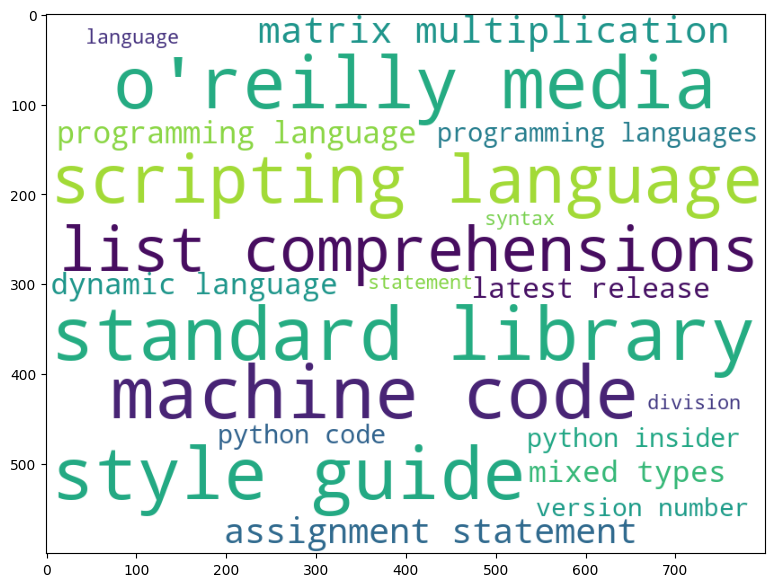

In [10]:
wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res[:20] }))

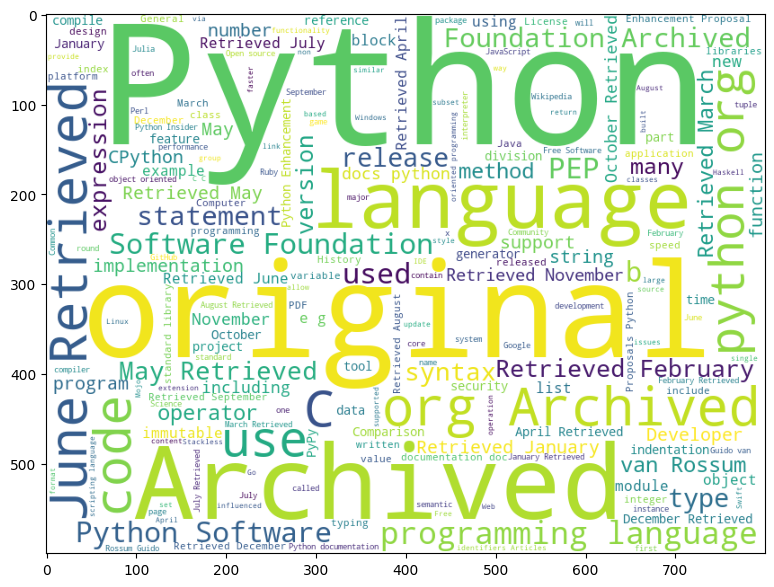

In [11]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))